In [1]:
##################################################################################################################
#Import section

from scipy import io
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
from math import isnan
import numpy.ma as ma
import h5py

import plotly.plotly as py
import plotly.graph_objs as go

##################################################################################################################
#Loading the file
import h5py
file_path = 'B20141210_1_LFP.mat'
file = h5py.File(file_path)

In [2]:
##################################################################################################################
#Tool box

def get_data_from_h5(data,file):
    name = h5py.h5r.get_name(data, file.id)
    data = np.transpose(file[name].value)
    return data

def get_data(file,data_type):
    if data_type == "correct_rejections":
        data = file["LFP"]["psMS_cr"]
        data = np.asarray(data)
    elif data_type == "seen":
        data = file["LFP"]["LUM"]["psMS_S"]
        data = np.asarray(data)[:,0]
        for i in range(len(data)):
            data[i]=get_data_from_h5(data[i],file)
    elif data_type == "missed":
        data = file["LFP"]["LUM"]["psMS_M"]
        data = np.asarray(data)[:,0]
        for i in range(len(data)):
            data[i]=get_data_from_h5(data[i],file)
    else:
        raise(BaseException("Data Type not found"))
    return data

def average_over(data,time=False,channels=False,trials=False,contrast=False):
    if contrast:
        averaged_data = []
        for trial_data in data:
            trial_data_averaged = average_over(trial_data,time=time,channels=channels,trials=trials)
            averaged_data.append(trial_data_averaged)

        data = np.asarray(averaged_data)
        data = np.nanmean(averaged_data,0)
    else:
        if trials:
            data = np.nanmean(data,2)
        if channels:
            data = np.nanmean(data,1)
        if time:
            data = np.nanmean(data,0)
    return data

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning:

Mean of empty slice



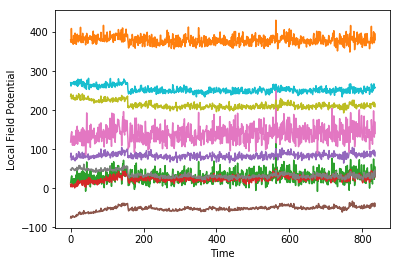

In [3]:
##################################################################################################################
#Ploting mean over trials for each electrodes (correct rejections trials)

#Getting the correct rejections trials
correct_rejection_data = get_data(file,"correct_rejections")

#Average over trials
correct_rejection_data_averaged = average_over(correct_rejection_data,time=False,channels=False,trials=True)

#Ploting ten electrodes over time
for i in range(10):
    electrode_data = correct_rejection_data_averaged[:,i]
    plt.plot(electrode_data)
    
plt.xlabel("Time")
plt.ylabel("Local Field Potential")
plt.show()

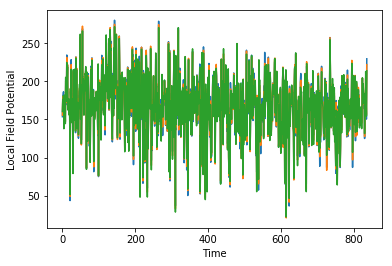

In [4]:
##################################################################################################################
#Ploting mean over electrodes for each correct rejection trials

#Getting the correct rejections trials
correct_rejection_data = get_data(file,"correct_rejections")

#Average over trials
correct_rejection_data_averaged = average_over(correct_rejection_data,time=False,channels=True,trials=False)

#Ploting three trials over time
for i in range(3):
    trial_data = correct_rejection_data_averaged[:,i]
    plt.plot(trial_data)

plt.xlabel("Time")
plt.ylabel("Local Field Potential")
plt.show()


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning:

Mean of empty slice



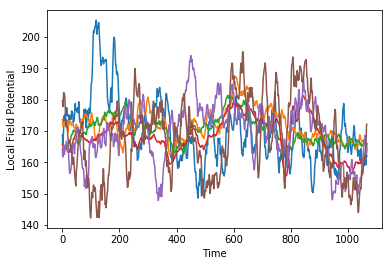

In [5]:
##################################################################################################################
#Ploting mean over electrodes over trials for seen trials (Grouped by Contrast)

#Getting the seen trials
seen_trials_data = get_data(file,"seen")


#Ploting LFP over time, grouped by contrasts, average over electrodes over trials
for trial_data in seen_trials_data:
    #Data cleaning
    try:
        trial_data_averaged = average_over(trial_data,time=False,channels=True,trials=True)
    except:
        #Excluding empty data
        pass    #Ploting the graph
    plt.plot(trial_data_averaged)

plt.xlabel("Time")
plt.ylabel("Local Field Potential")
plt.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning:

Mean of empty slice



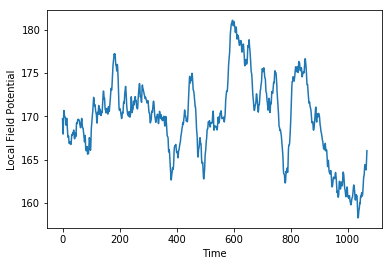

In [6]:
##################################################################################################################
#Ploting mean over electrodes over trials over contrasts for seen trials

#Getting the seen trials
seen_trials_data = get_data(file,"seen")

#Averaging over trials, over electrodes, over contrasts
trial_data_averaged = average_over(seen_trials_data,time=False,channels=True,trials=True,contrast=True)

#Ploting LFP over time
plt.plot(trial_data_averaged)
plt.xlabel("Time")
plt.ylabel("Local Field Potential")
plt.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning:

Mean of empty slice



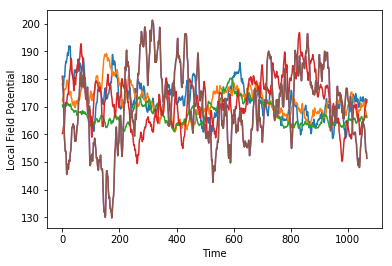

In [7]:
##################################################################################################################
#Ploting mean over electrodes over trials for missed trials (Grouped by Contrast)

#Getting the seen trials
miss_trials_data = get_data(file,"missed")


#Ploting LFP over time, grouped by contrasts, average over electrodes over trials
for trial_data in miss_trials_data:
    #Data cleaning
    try:
        trial_data_averaged = average_over(trial_data,time=False,channels=True,trials=True)
    except:
        #Excluding empty data
        pass
    #Ploting the graph
    plt.plot(trial_data_averaged)

plt.xlabel("Time")
plt.ylabel("Local Field Potential")
plt.show()
